<a href="https://colab.research.google.com/github/celinemukura/music_recommender/blob/master/wine_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [4]:
wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [5]:
#number of rows and columns
wine_dataset.shape

(1596, 12)

In [7]:
#first five rows of dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
#check for any inconsistencies
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis & Visualisation

In [9]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


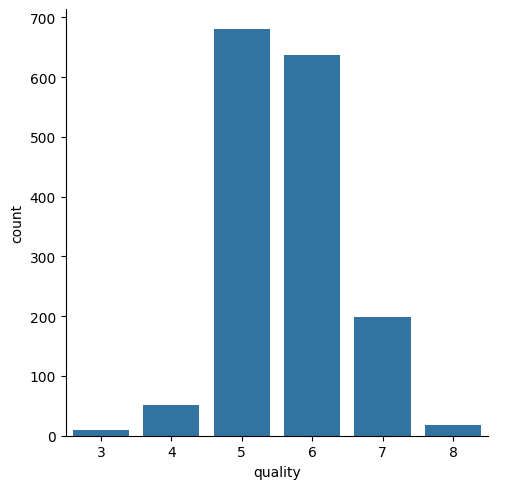

In [11]:
#number of value for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

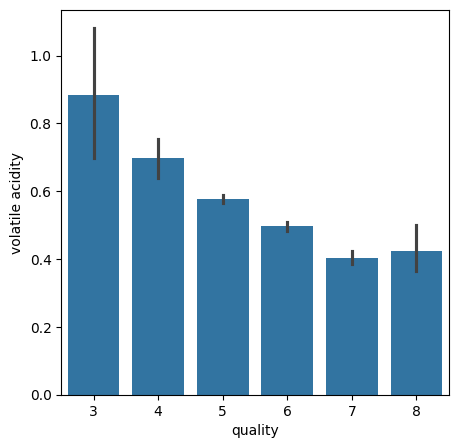

In [13]:
#compare volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', data = wine_dataset, y = 'volatile acidity')
#inversely proportional

<Axes: xlabel='quality', ylabel='citric acid'>

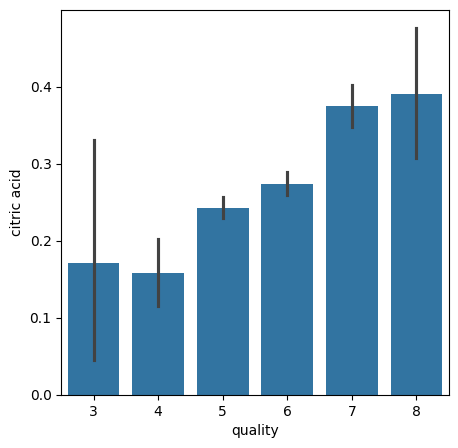

In [14]:
#compare citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', data = wine_dataset, y = 'citric acid')
#directly proportional

Correlation (Positive & Negative)

In [16]:
correlation = wine_dataset.corr()

<Axes: >

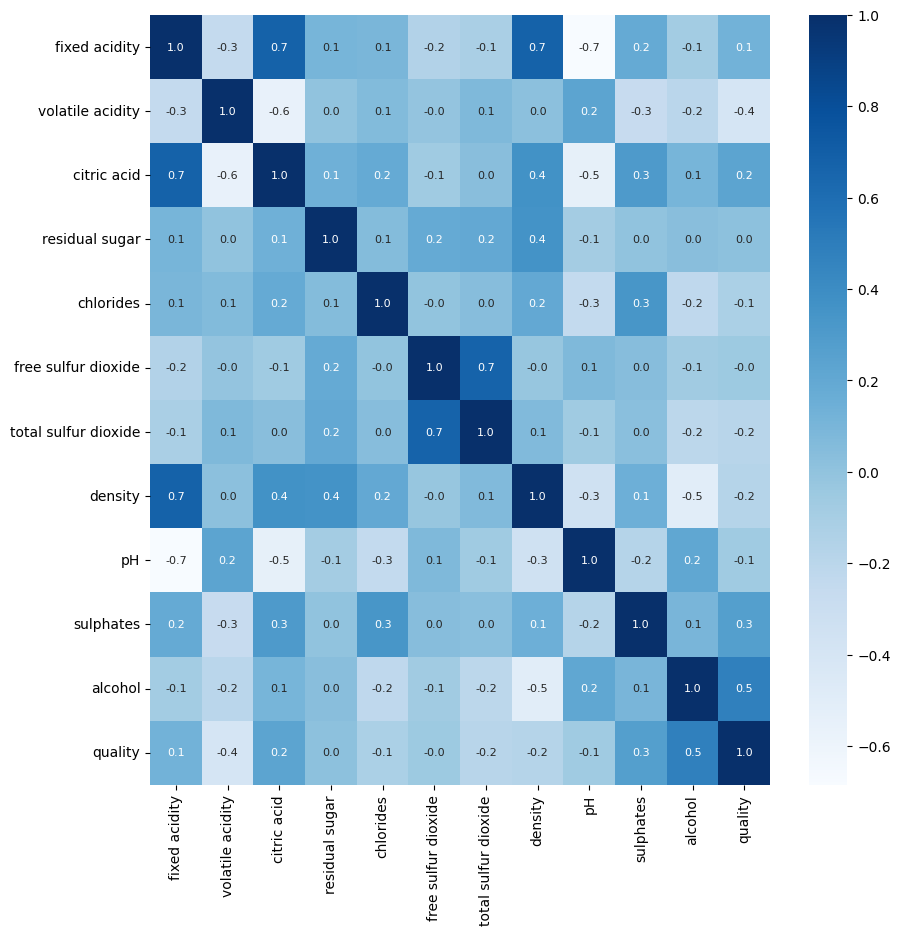

In [17]:
#constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues' )

Data Preprocessing

In [18]:
#seperate the data
X = wine_dataset.drop('quality', axis=1)


In [19]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Labelling Binarization

In [20]:
#replacing the values to when the quality is 7> label it as 1(good), and if its <6, label it as 0 (bad)
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [21]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1591    0
1592    0
1593    0
1594    0
1595    0
Name: quality, Length: 1596, dtype: int64

Splitting dataset into train and test dataset

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [26]:
Y.shape, Y_train.shape, Y_test.shape

((1596,), (1276,), (320,))

Training Model using rnadom forest classifier algorithm

In [27]:
model = RandomForestClassifier()

In [28]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

In [29]:
#accuracy on test data
X_test_prediction = model.predict(X_test) #has to predict quality values
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print('Accuracy: ', test_data_accuracy)

Accuracy:  0.884375


Building a predictive system

In [31]:
input_data = (7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8)
#changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshaping the numpy array to predict the label for one value
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [32]:
prediction

array([0])

In [33]:
if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Bad Quality Wine
